<a id='up'></a>
# Part I - [Airline On-Time Performance Data](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009)
## by Odai Alsalieti

## Introduction
> This database contains scheduled and actual departure and arrival times reported by certified U.S. air carriers that account for at least one percent of domestic scheduled passenger revenues. The data is collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS).

> [Flights](https://community.amstat.org/jointscsg-section/dataexpo/dataexpo2009) The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. You can see the database description [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D)

>Since this is a large dataset; there are approximately 120 million records in total, and takes up to 12 GiB storage space. So, I choose to deal with moving average for last 3 years(2006-2007-2008) [downloaded here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7)

> ## Exploration sections:
>- ### [Univariate Exploration](#uni)
>- ### [Bivariate Exploration](#biva)
>- ### [Multiivariate Exploration](#multi)
>- ### [Conclusion](#conc)
>- ### [Sources](#src)


## Preliminary Wrangling


[Go Down](#down)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Because the data volume is very large, I downloaded the files for the last three years and merged them into one table and selected canceled or delayed flights only to analyze them to find the reasons for that
After that I saved the new extracted data in another file and deleted the rest of the data so I commented the following codes

In [2]:
#df_06 = pd.read_csv("2006.csv", encoding ='ISO-8859-1')
#df_07 = pd.read_csv("2007.csv", encoding ='ISO-8859-1')
#df_08 = pd.read_csv("2008.csv", encoding ='ISO-8859-1')

In [3]:
#print(df_06.shape)
#df_06.head()

In [4]:
#print(df_07.shape)
#df_07.head()

In [5]:
#print(df_08.shape)
#df_08.head()

In [6]:
#create combined data frame for delayed and cancelled flights for the years 2008 , 2007, 2008
#df = df_06.append(df_07, ignore_index=True)
#df = df.append(df_08, ignore_index=True)

In [7]:
#df = df.query('ArrDelay >= 15 or DepDelay >=15 or Cancelled == 1')

In [8]:
#print(df.shape)
#df.head()

In [9]:
#export clean dataframe to csv for later use
#df.to_csv('flights.csv', index = False)

In [10]:
# Read combined data frame Csv file
df = pd.read_csv("flights.csv", encoding ='ISO-8859-1')

In [11]:
# Load 5 rows and print shape
print(df.shape)
df.head()

(6060821, 29)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,4.0,21.0,0,NaN,0,0.0,0.0,20.0,0.0,0.0
1,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1752.0,1540,1923.0,1654,US,127,...,3.0,19.0,0,NaN,0,0.0,0.0,149.0,0.0,0.0
3,2006,1,11,3,1153.0,1145,1324.0,1259,US,637,...,3.0,38.0,0,NaN,0,0.0,0.0,25.0,0.0,0.0
4,2006,1,11,3,806.0,810,1035.0,1020,US,218,...,8.0,13.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0


In [12]:
# Get info about df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060821 entries, 0 to 6060820
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [13]:
# Describtion of df
df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,6.060821e+06,6.060821e+06,6.060821e+06,6.060821e+06,5.641893e+06,6.060821e+06,5.623909e+06,6.060821e+06,6.060821e+06,5.622963e+06,...,6.060821e+06,5.918291e+06,5.923763e+06,6.060821e+06,6.060821e+06,5.709770e+06,5.709770e+06,5.709770e+06,5.709770e+06,5.709770e+06
mean,2.006983e+03,6.407828e+00,1.588541e+01,3.961709e+00,1.509631e+03,1.453387e+03,1.608323e+03,1.619454e+03,2.275277e+03,1.401712e+02,...,7.558384e+02,7.815988e+00,2.061965e+01,6.931668e-02,2.927326e-03,1.350526e+01,2.666869e+00,1.400809e+01,8.977472e-02,1.785028e+01
std,7.970499e-01,3.491902e+00,8.718390e+00,1.974145e+00,4.652097e+02,4.370080e+02,5.560598e+02,4.695433e+02,2.015150e+03,7.578788e+01,...,5.768816e+02,3.181661e+01,1.805588e+01,2.539919e-01,5.402553e-02,3.683084e+01,1.758650e+01,2.891299e+01,2.115847e+00,3.676868e+01
min,2.006000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.006000e+03,3.000000e+00,8.000000e+00,2.000000e+00,1.150000e+03,1.117000e+03,1.304000e+03,1.303000e+03,6.230000e+02,8.500000e+01,...,3.340000e+02,4.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.007000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.548000e+03,1.509000e+03,1.720000e+03,1.701000e+03,1.567000e+03,1.220000e+02,...,5.990000e+02,6.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.008000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.902000e+03,1.815000e+03,2.036000e+03,2.010000e+03,3.788000e+03,1.730000e+02,...,9.870000e+02,8.000000e+00,2.500000e+01,0.000000e+00,0.000000e+00,1.400000e+01,0.000000e+00,1.800000e+01,0.000000e+00,2.100000e+01
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.930000e+03,2.359000e+03,2.955000e+03,2.400000e+03,9.741000e+03,1.879000e+03,...,4.962000e+03,1.501000e+03,4.350000e+02,1.000000e+00,1.000000e+00,2.580000e+03,1.429000e+03,1.392000e+03,3.920000e+02,1.366000e+03


In [14]:
# Check the number of unique values
df.nunique()

Year                    3
Month                  12
DayofMonth             31
DayOfWeek               7
DepTime              1552
CRSDepTime           1241
ArrTime              1634
CRSArrTime           1429
UniqueCarrier          21
FlightNum            7684
TailNum              6219
ActualElapsedTime     779
CRSElapsedTime        611
AirTime               900
ArrDelay             1378
DepDelay             1405
Origin                314
Dest                  314
Distance             1498
TaxiIn                288
TaxiOut               368
Cancelled               2
CancellationCode        4
Diverted                2
CarrierDelay         1226
WeatherDelay          775
NASDelay              697
SecurityDelay         237
LateAircraftDelay     694
dtype: int64

In [15]:
# Check number of duplicated values
df.duplicated().sum()

12

In [16]:
# Check the number of null values
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               418928
CRSDepTime                 0
ArrTime               436912
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83384
ActualElapsedTime     437858
CRSElapsedTime           860
AirTime               437858
ArrDelay              437858
DepDelay              418928
Origin                     0
Dest                       0
Distance                   0
TaxiIn                142530
TaxiOut               137058
Cancelled                  0
CancellationCode     5640704
Diverted                   0
CarrierDelay          351051
WeatherDelay          351051
NASDelay              351051
SecurityDelay         351051
LateAircraftDelay     351051
dtype: int64

In [17]:
# Drop duplicated rows
df.drop_duplicates()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,825.0,820,1041.0,1021,US,349,...,4.0,21.0,0,NaN,0,0.0,0.0,20.0,0.0,0.0
1,2006,1,11,3,NaN,1725,NaN,1845,US,69,...,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
2,2006,1,11,3,1752.0,1540,1923.0,1654,US,127,...,3.0,19.0,0,NaN,0,0.0,0.0,149.0,0.0,0.0
3,2006,1,11,3,1153.0,1145,1324.0,1259,US,637,...,3.0,38.0,0,NaN,0,0.0,0.0,25.0,0.0,0.0
4,2006,1,11,3,806.0,810,1035.0,1020,US,218,...,8.0,13.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6060816,2008,12,13,6,848.0,850,1024.0,1005,DL,1628,...,4.0,44.0,0,NaN,0,0.0,0.0,19.0,0.0,0.0
6060817,2008,12,13,6,657.0,600,904.0,749,DL,1631,...,15.0,34.0,0,NaN,0,0.0,57.0,18.0,0.0,0.0
6060818,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,...,8.0,32.0,0,NaN,0,1.0,0.0,19.0,0.0,79.0
6060819,2008,12,13,6,638.0,640,808.0,753,DL,1632,...,14.0,26.0,0,NaN,0,0.0,0.0,15.0,0.0,0.0


In [18]:
# Update NaN time values in variables of interest to 0 to avoid this error where ploting
# SVD did not converge in Linear Least Squares
df['AirTime'] = df['AirTime'].fillna(0)
df['DepDelay']= df['DepDelay'].fillna(0)
df['ArrDelay'] = df['ArrDelay'].fillna(0)
df['TaxiIn'] = df['TaxiIn'].fillna(0)
df['TaxiOut'] = df['TaxiOut'].fillna(0)

In [19]:
# Change dtype of scheduled departure and arrival times to hours only
df['CRSDepTime'] = pd.to_datetime(df.CRSDepTime, format='%H', exact=False).dt.hour
df['CRSArrTime'] = pd.to_datetime(df.CRSArrTime, format='%H', exact=False).dt.hour

### What is the structure of your dataset?

> The extracted data contains 6060809 rows × 29 columns that are described [here](https://www.transtats.bts.gov/DatabaseInfo.asp?QO_VQ=EFD&Yv0x=D) in detail

### What is/are the main feature(s) of interest in your dataset?

> I am more interested in researching delayed and canceled flights and researching their causes

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features in the dataset that I think will help support my investigation are that all possible information is provided in the columns: **('Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',, 'AirTime', 'ArrDelay','DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled' , 'CancellationCode')**

<a id='uni'></a>
## Univariate Exploration

In [20]:
# Define plot function To avoid re-writing the code
def plot (i):
    # Set plot size
    plt.subplots(figsize=(15,8))
    # Extract data
    plt_data = df[i].value_counts().head(10)
    # Set order values
    plt_order = plt_data.index
    # Set Plot Color
    c_palette = sb.color_palette("colorblind",10)
    colors = c_palette[0]
    # Set columns of interest
    col = ['DayofMonth', 'Month', 'CancellationCode', 'CRSDepTime', 'CRSArrTime']
    if i in col:
        data = df[i].value_counts().sort_index(ascending=True)
        ax = sb.countplot(data=df, x=i,color=colors)
        plt.axhline(data.mean(), c='red')
    elif i=='TailNum':
        # Extract data without tail numbers 0, and 000000
        tail_data = df[(df['TailNum'] != "0") & (df['TailNum'] != "000000")]['TailNum'].value_counts().head(10)
        # Set order values
        orders = tail_data.head(10).index
        #Plot data
        ax = sb.countplot(data=df, x = 'TailNum',color=colors,order = orders)
        plt.axhline(tail_data.mean(), c='red')
    else:
        ax = sb.countplot(data=df, x=i, color=colors, order=plt_order);
        plt.axhline(plt_data.mean(), c='red')
    #add values to bars
    for p in ax.patches:
        ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03), rotation = 90,
                    color = 'white', horizontalalignment='center', verticalalignment='top',
                    size=14)
    # Add xticklabels
    if i=='DayOfWeek':
        week_day = ['Friday','Thursday','Monday','Sunday','Wednesday', 'Tuesday',  'Saturday']
        ax.set_xticklabels(week_day)
    if i=='CancellationCode':
        cancelled_code = ['Carrier', 'Weather', 'NAS', 'Security']
        ax.set_xticklabels(cancelled_code)   
    #set title and axis
    titles = 'Top 10 Delays and Cancellation by ' + i 
    plt.title(titles, fontsize=16);
    plt.xlabel(i, fontsize=14);
    plt.ylabel('Total number of delays (>=15) or cancellations \n 2008, 2007, 2006', fontsize=14);
    #display plot
    plt.show();

## What are the Top 10 Delays and Cancellation by UniqueCarrier? 

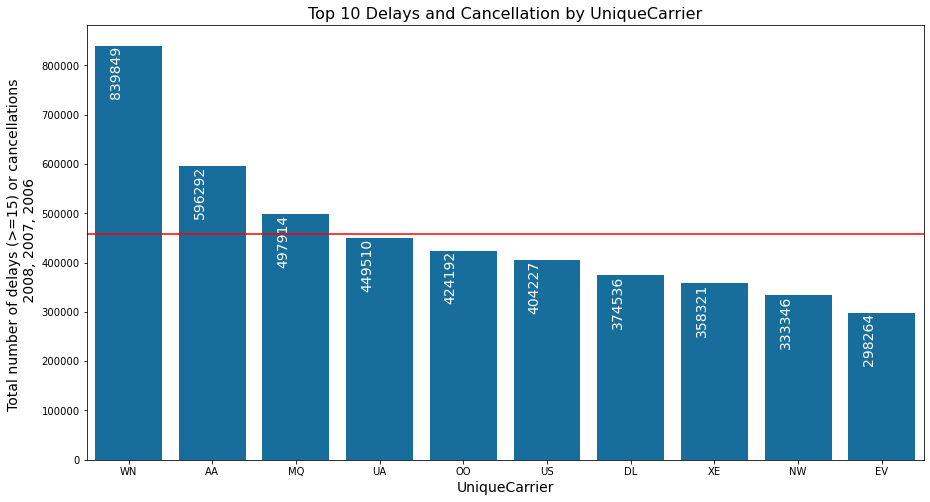

In [21]:
# Top 10 Delays and Cancellation by UniqueCarrier
plot('UniqueCarrier')

>  **Southwest Airlines** , **American Airlines** and **Envoy Air**: had the most delays and cancellation over mean by Carrier in **2008**, **2007**, **2006** 

## What are the Top 10 Delays and Cancellation by Origin?

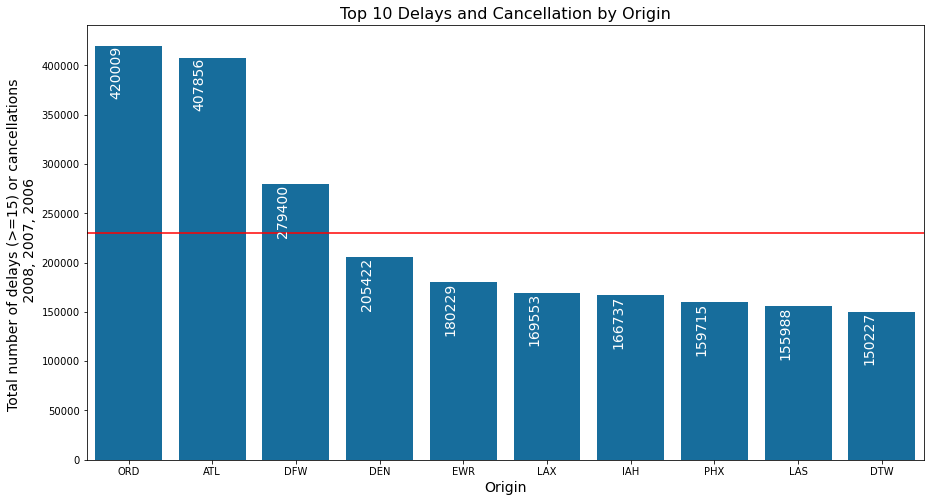

In [22]:
# Top 10 Delays and Cancellation by Origin
plot('Origin')

> **Chicago O'Hare International Airport (ORD)** , **Atlanta Airport (ATL)** and **Dallas/Ft Worth Intl(DFW)**: had the most delays and cancellation over mean by Origin in **2008, 2007, 2006**

## What are the Top 10 Delays and Cancellation by Dest?

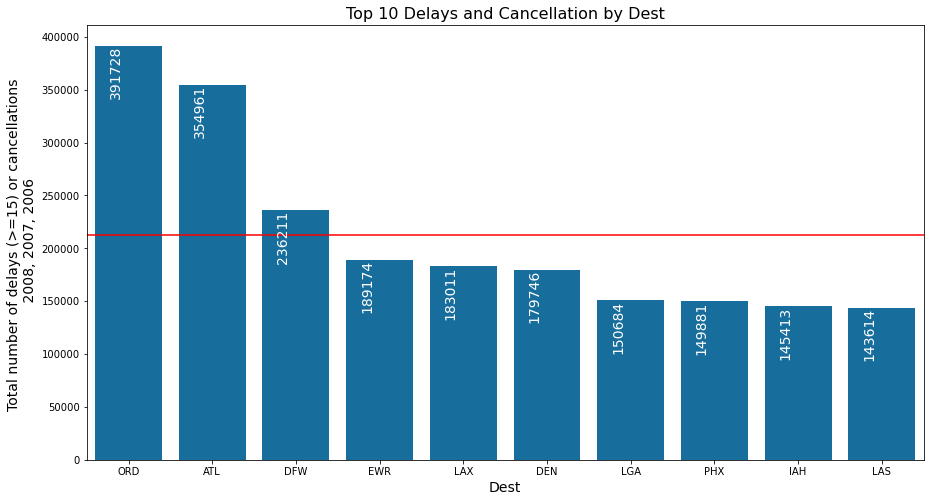

In [23]:
# Top 10 Delays and Cancellation by Dest
plot('Dest')

> **Chicago O'Hare International Airport (ORD)** , **Atlanta Airport (ATL)** and **Dallas/Ft Worth Intl(DFW)**: had the most delays and cancellation over mean by Dest in **2008, 2007, 2006**

## What are the Top 10 Delays and Cancellation by DayofWeek?

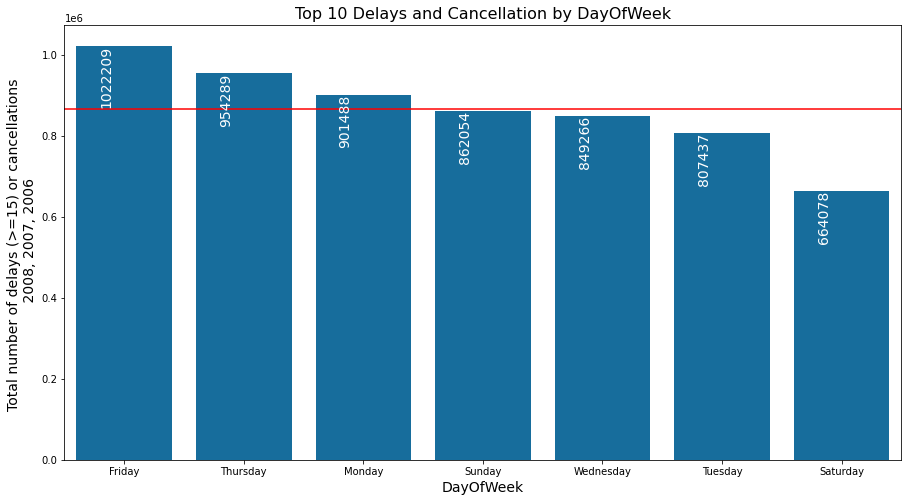

In [24]:
# Top 10 Delays and Cancellation by DayofWeek
plot('DayOfWeek')

> **Friday** had the most delays and cancellation over mean in **2008, 2007, 2006**

## What are the Top 10 Delays and Cancellation by DayofMonth?

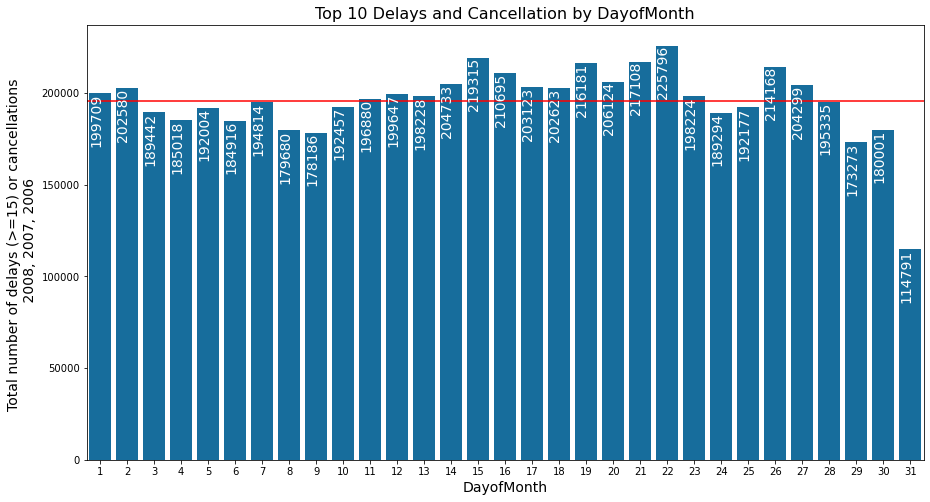

In [25]:
# Top 10 Delays and Cancellation by DayofMonth
plot('DayofMonth')

> the **22th** day of month had the most delays and cancellation over mean in **2008, 2007, 2006**

## What are the Top 10 Delays and Cancellation by Month?

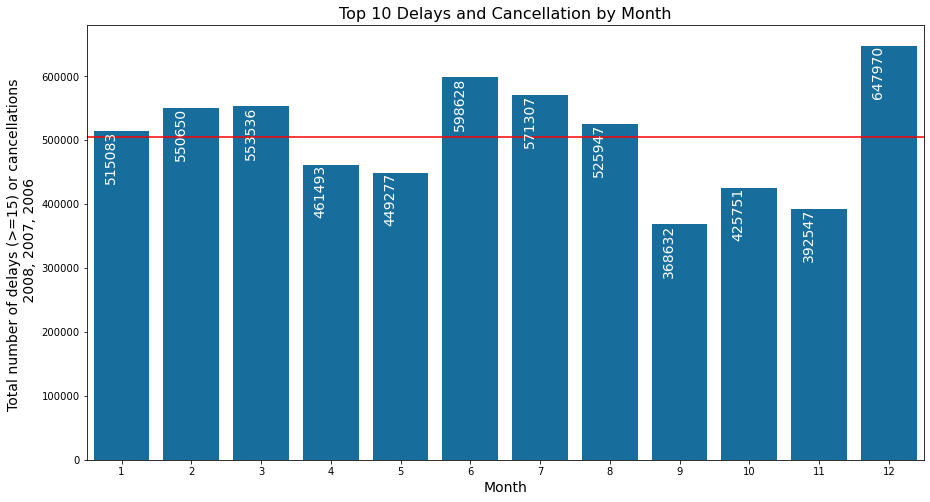

In [26]:
# Top 10 Delays and Cancellation by Month
plot('Month')

> **December** had the most delays and cancellation over mean in **2008, 2007, 2006**

## What are the Top 10 Delays and Cancellation by Cancellation Code?

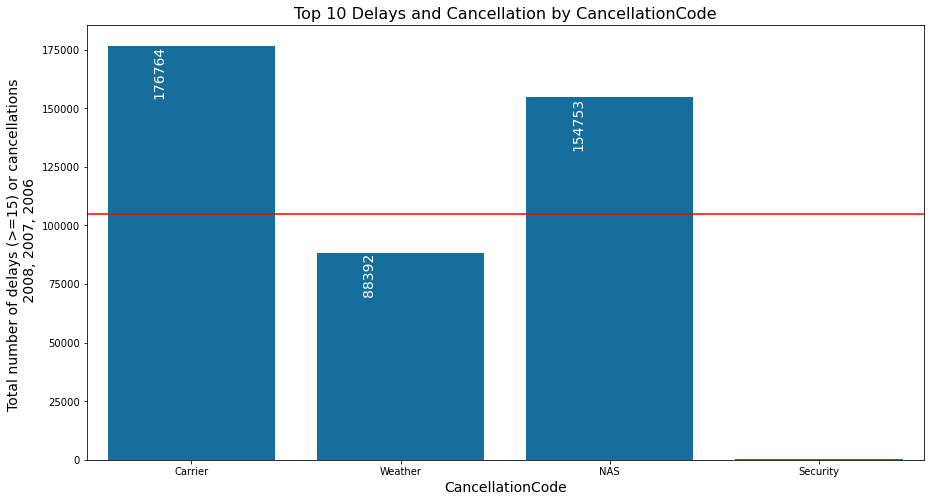

In [27]:
# Top 10 Delays and Cancellation by Cancellation Code
plot('CancellationCode')

> Cancellation by Carrier and National Aviation System are the top two reasons for cancellations over mean

## What are the Top 10 Delays and Cancellation by Scheduled Departure time?

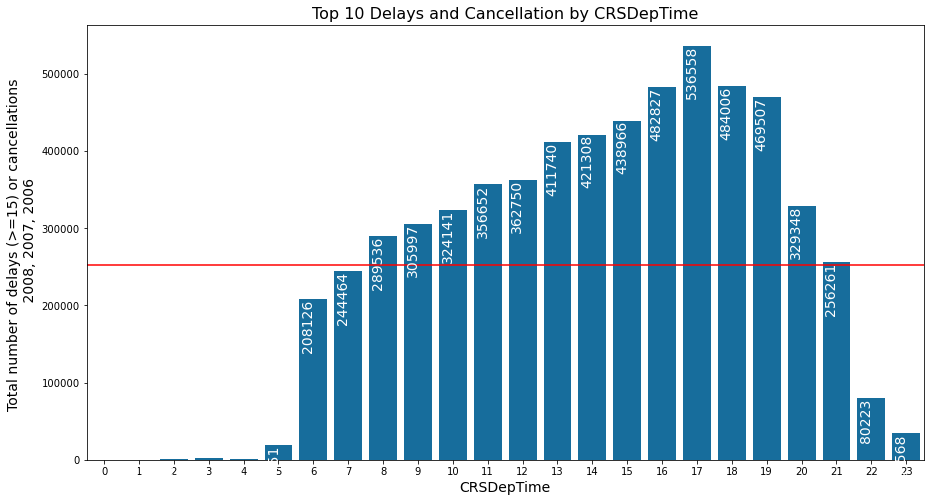

In [28]:
# Top 10 Delays and Cancellation by Scheduled Departure time
plot('CRSDepTime')

> Scheduled departure time Maximum delay or cancellation is at 17:00

## What are the Top 10 Delays and Cancellation by Scheduled Arrival time?

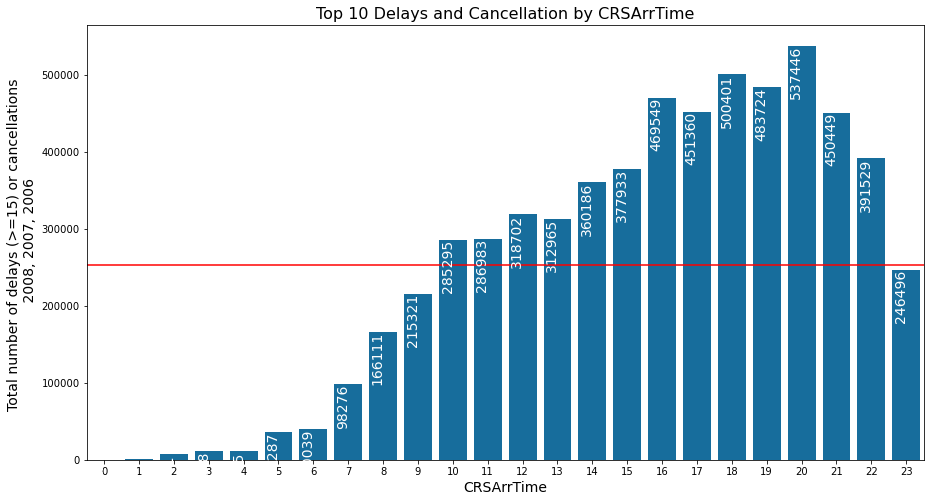

In [29]:
# Top 10 Delays and Cancellation by Scheduled Arrival time
plot('CRSArrTime')

> Scheduled Arrival time Maximum delay or cancellation is at 20:00

## What are the Top 10 Delays and Cancellation by Tail Number?

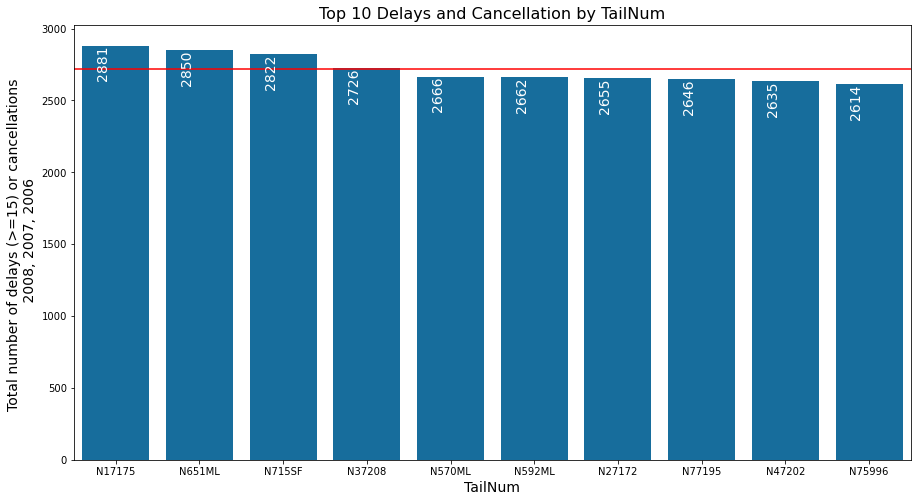

In [30]:
# Top 10 Delays and Cancellation by Tail Number
plot('TailNum')

> Plans with tail numbers : **N17175**, **N651ML**, **N715SF**, had the most delays and cancellation

## What are the Top 10 Delays and Cancellation by Flight Number?

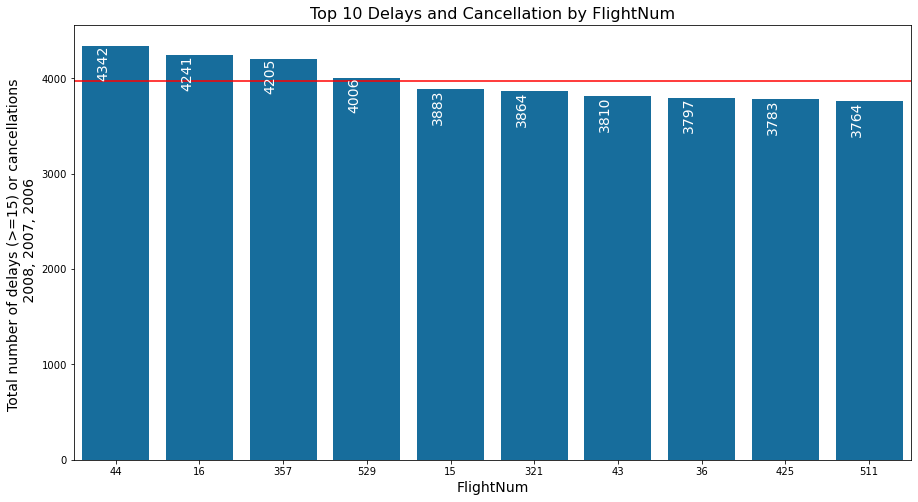

In [31]:
# Top 10 Delays and Cancellation by Flight Number
plot('FlightNum')

> Flights number **44** , **16**, **357** had the most delays

## What are the Top 10 Delays and Cancellation by Distance?

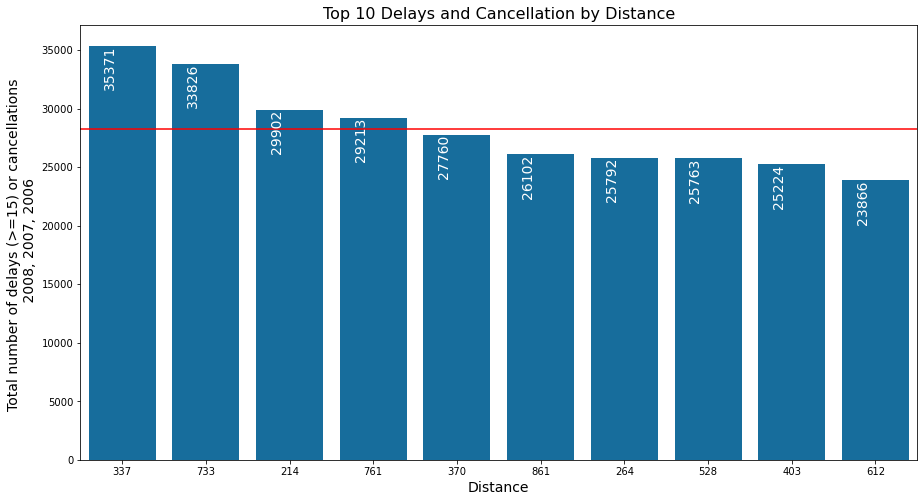

In [32]:
# Top 10 Delays and Cancellation by Distance
plot('Distance')

> Distance = **337 miles** had the most delays and cancellation

## What are the Delays and Cancellation by Airtime?

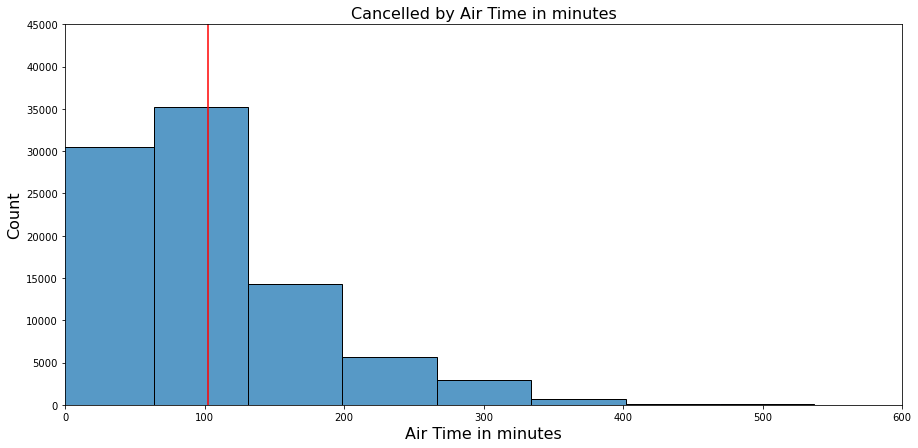

In [33]:
# Delay or cancellation flight by Air Time
#define plot
fig, ax = plt.subplots(figsize=(15,7))

#generate data
ar_data = df[(df['Cancelled']== 0) & (df['AirTime']> 0)]
sb.histplot(data=df, x = 'AirTime',bins=50, stat = "frequency")

#set title and axis
plt.title('Cancelled by Air Time in minutes', fontsize=16);
plt.xlabel('Air Time in minutes', fontsize=16);
plt.ylabel('Count', fontsize=16);

#plot mean line
plt.axvline(x=df.AirTime.mean(), c='red')
plt.axis([0,600, 0, 45000])

#display plot
plt.show()

> Airtime on short flights of **100 minutes** or less has the Greatest cancelled flights

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The data analysis showed several types of distribution that correspond to the reality of canceled or delayed flights.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> This data does not contain outliers and does not need any changes

<a id='biva'></a>
## Bivariate Exploration

In [34]:
# Define function to plot scatterplot to show relationship between two variables 
def relation(i,z):
    # Set plot size
    f,ax = plt.subplots(figsize=(11, 8));
    # Set x,y
    x = np.array(df[i])
    y = np.array(df[z])
    # plot data
    plt.scatter(x,y)
    # plot line regression
    #obtain m (slope) and b(intercept) of linear regression line
    m, b = np.polyfit(x, y, 1)
    #add linear regression line to scatterplot 
    plt.plot(x, m*x + b,"r-")
    #Set Title
    titl = 'Relationship between '+ i +' and ' + z
    plt.title(titl, fontsize=16);
    #Set labels
    plt.xlabel(i, fontsize=14);
    plt.ylabel(z, fontsize=14);
    # Focus on the delays >=15
    plt.xlim(14,);
    plt.ylim(14,);
    plt.show();

## What is the relationship between DepDelay' and 'ArrDelay'?

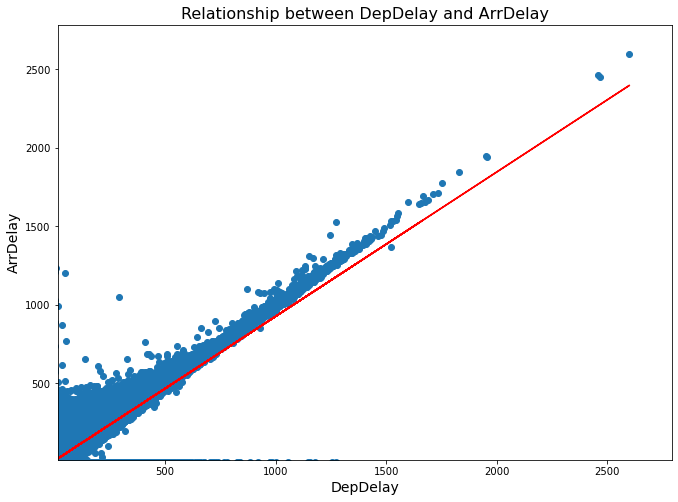

In [35]:
# Plot Relation between 'DepDelay' and 'ArrDelay'
relation('DepDelay','ArrDelay')

> There is a strong relationship between 'DepDelay' and 'ArrDelay'

## What is the relationship between 'ArrDelay' and 'AirTime'?

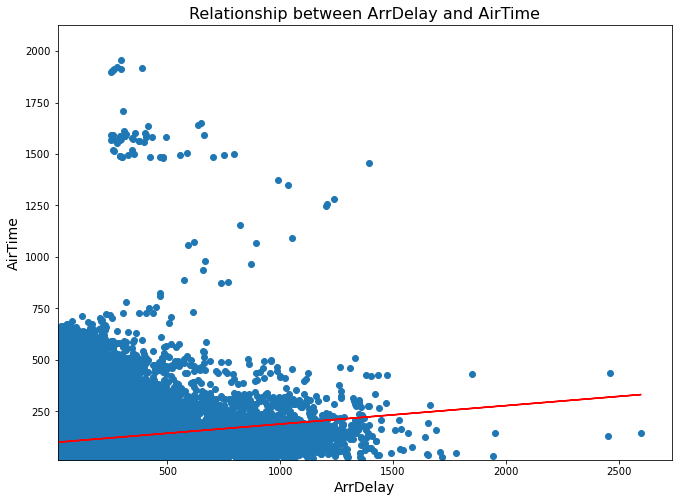

In [36]:
# Plot Relation between 'ArrDelay' and 'AirTime'
relation('ArrDelay','AirTime')

> There is a positive Relation between 'ArrDelay' and 'AirTime'

## What is the relationship between 'Distance' and 'AirTime'?

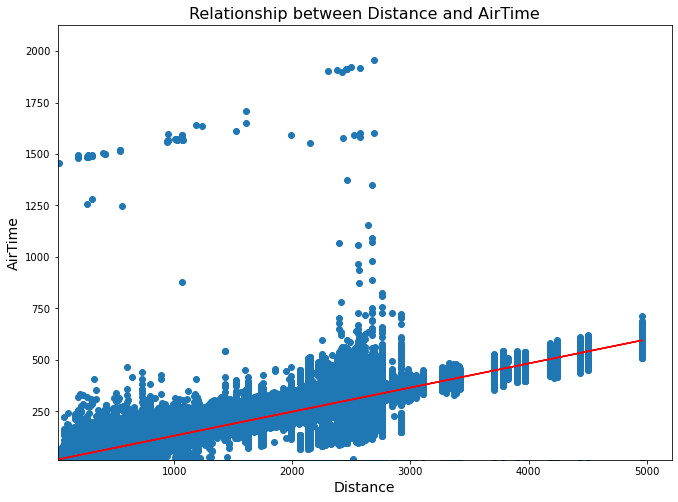

In [37]:
# Plot Relation between 'Distance' and 'AirTime'
relation('Distance','AirTime')

> There is a positive relationship between 'Distance' and 'AirTime'

## What is the relationship between 'DepDelay' and 'AirTime'?

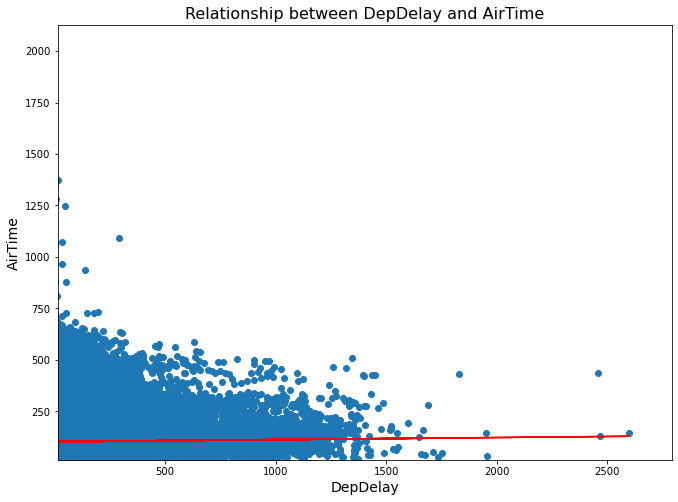

In [38]:
# Plot Relation between 'DepDelay' and 'AirTime'
relation('DepDelay','AirTime')

## What is the relationship between 'TaxiIn' and 'DepDelay'?

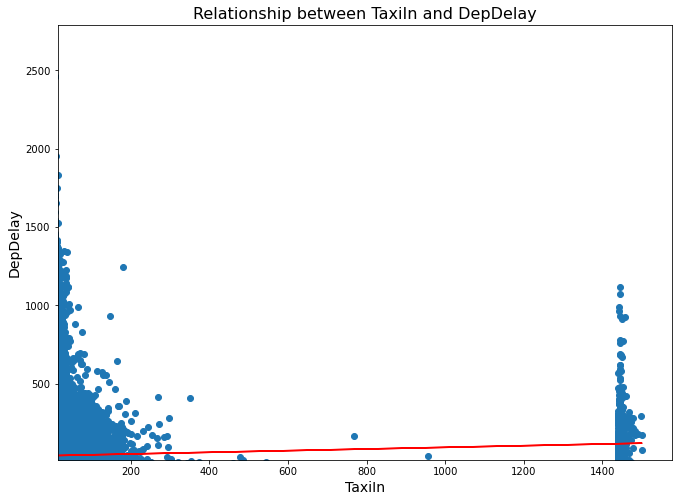

In [39]:
# Plot Relation between 'TaxiIn' and 'DepDelay'
relation('TaxiIn','DepDelay')

>There is a relationship between 'TaxiIn' and 'DepDelay'

## What is the relationship between 'TaxiOut' and 'DepDelay'?

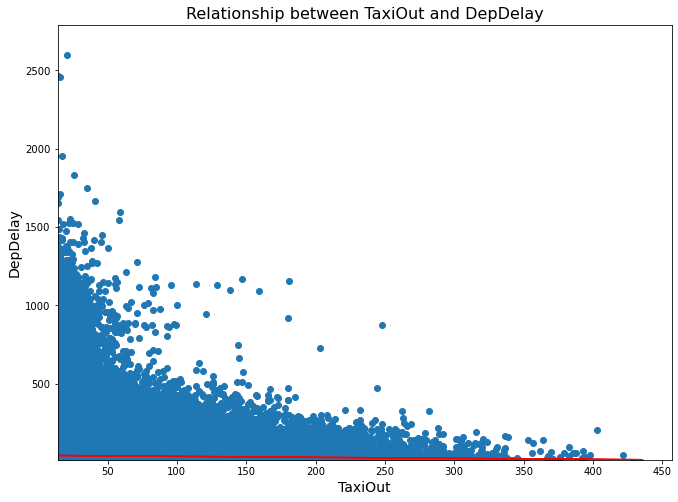

In [40]:
# Plot Relation between 'TaxiOut' and 'DepDelay'
relation('TaxiOut','DepDelay')

> There is Inverse relationship between 'TaxiOut' and 'DepDelay' since the linear regression had negative slop

## What is the relationship between 'TaxiIn' and 'ArrDelay'?

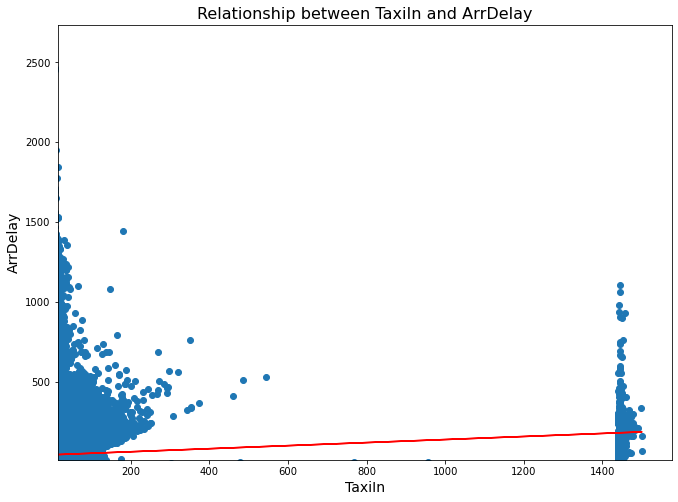

In [41]:
# Plot Relation between 'TaxiIn' and 'ArrDelay'
relation('TaxiIn', 'ArrDelay')

> There is Positive relationShip between 'TaxiIn' and 'ArrDelay'

## What is the relationship between 'TaxiOut' and 'ArrDelay'?

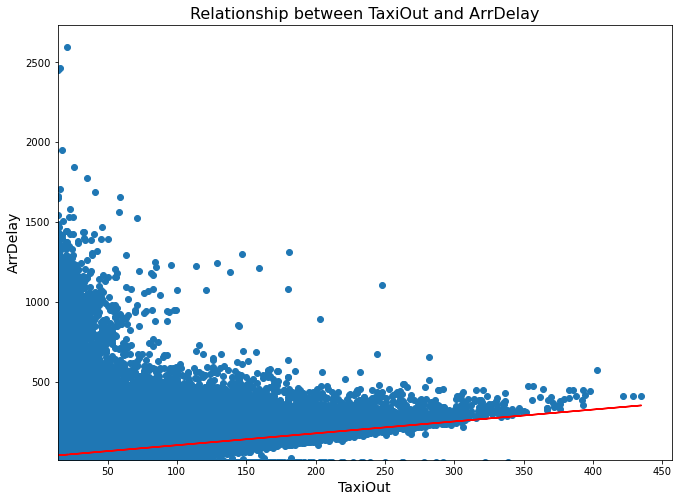

In [42]:
# Plot Relation between 'TaxiOut' and 'ArrDelay'
relation('TaxiOut','ArrDelay')

> There is positive Relationship between 'TaxiIn' and 'ArrDelay'

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - There is positive relationship between:<br>
. 'DepDelay' and 'ArrDelay'<br>
. 'TaxiOut','ArrDelay'<br>
. 'Distance','AirTime'<br>
. 'ArrDelay','AirTime'<br>
. 'TaxiIn' and 'ArrDelay'<br>
> - There is Inverse relationship between 'TaxiOut' and 'DepDelay' 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
> Air time less than 1500 minutes has both departure and arrival delays

<a id='multi'></a>
## Multivariate Exploration

## What is the relationship between all variables of interest?

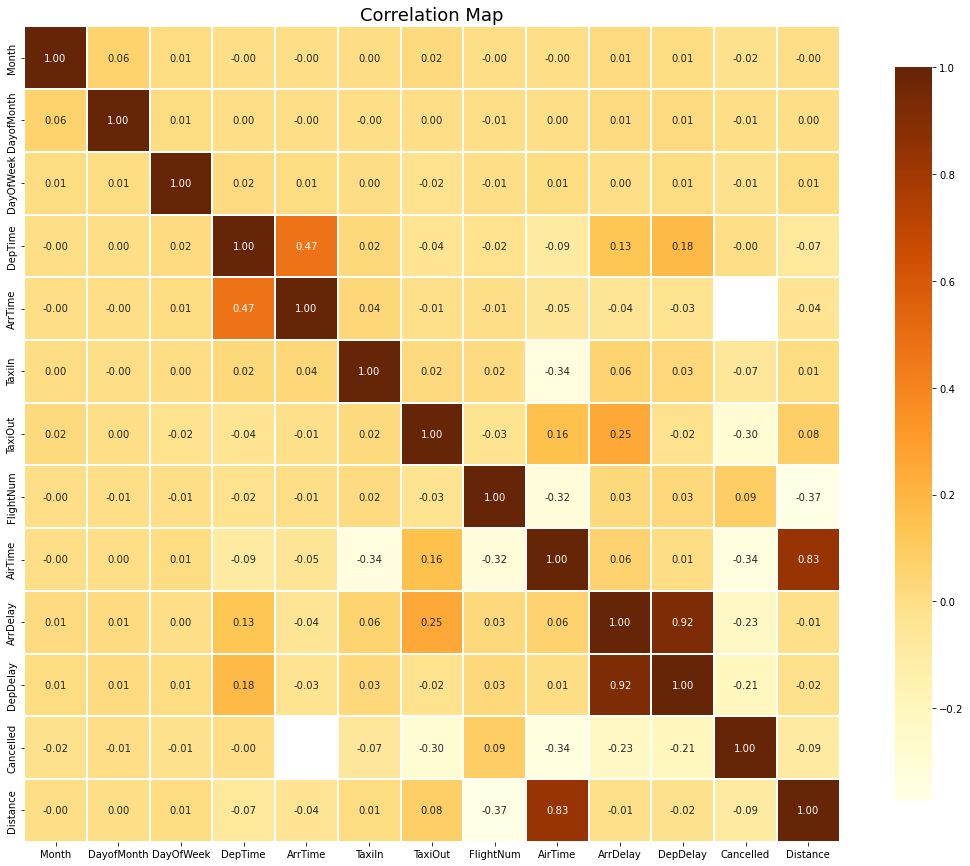

In [43]:
#plot correlation map between all variables of interest
# set size of plot
f,ax = plt.subplots(figsize=(20, 15));
# Define plot of all interesting variables
sb.heatmap(df[['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime','TaxiIn',
               'TaxiOut','UniqueCarrier', 'FlightNum', 'TailNum','AirTime', 'ArrDelay',
               'DepDelay', 'Origin', 'Dest', 'Cancelled', 'Distance']].corr(),
           cmap="YlOrBr", square=True, annot=True, fmt= '.2f',ax=ax,
           linewidth=0.3, cbar_kws={"shrink": 0.9});
# set title
plt.title('Correlation Map', fontsize=18);

> Correlation Map: there is a very strong relationship between: <br>
.  'DepDelay' and 'ArrDelay'<br>
. 'Distance','AirTime'<br>

## What is the Day of Month has the most Departure Delays?

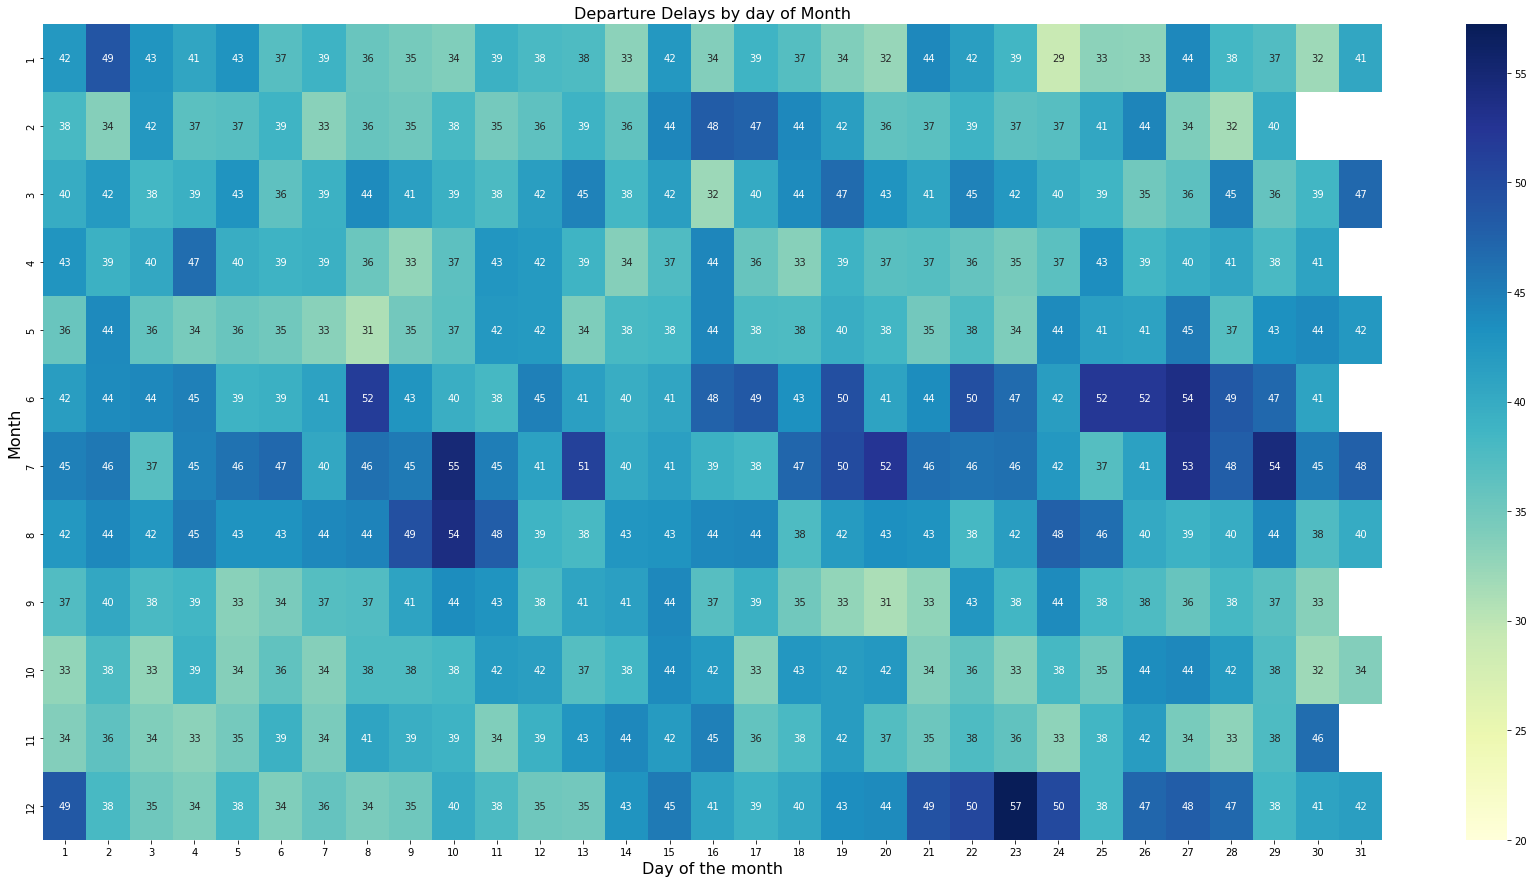

In [44]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayofMonth', values='DepDelay', aggfunc='mean')

#generate plot
plt.figure(figsize=(30,15));
sb.heatmap(pl, annot=True, cmap='YlGnBu', vmin=20);

#set title and axis

plt.title('Departure Delays by day of Month', fontsize=16);
plt.xlabel('Day of the month', fontsize=16);
plt.ylabel('Month', fontsize=16);

> Departure Delays by day of Month:
 23th December had the highest Average of Departure delays

## What is the Day of Week has the most Departure Delays?

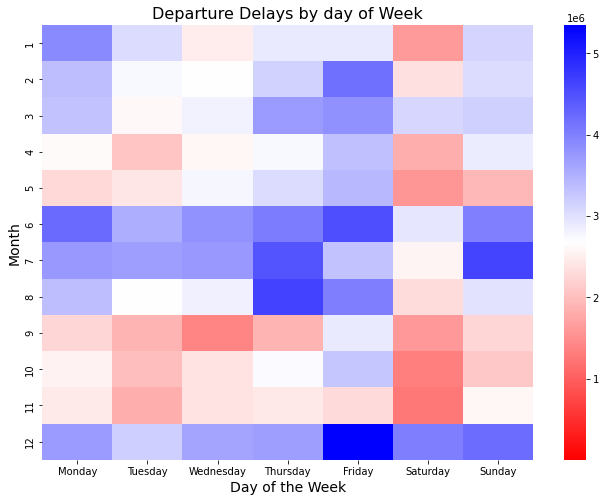

In [45]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayOfWeek', values='DepDelay', aggfunc='sum')

#generate plot
plt.figure(figsize=(11,8));
graph = sb.heatmap(pl, cmap='bwr_r', vmin=15);

#set title and axis
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']
graph.set_xticklabels(week_day);
#SET Title
plt.title('Departure Delays by day of Week', fontsize=16);
plt.xlabel('Day of the Week', fontsize=14);
plt.ylabel('Month', fontsize=14);

>Departure Delays by day of Week:
Friday in December is the day that had the highest Average of Departure delays

## What is the Day of Month has the most Cancelled Flights?

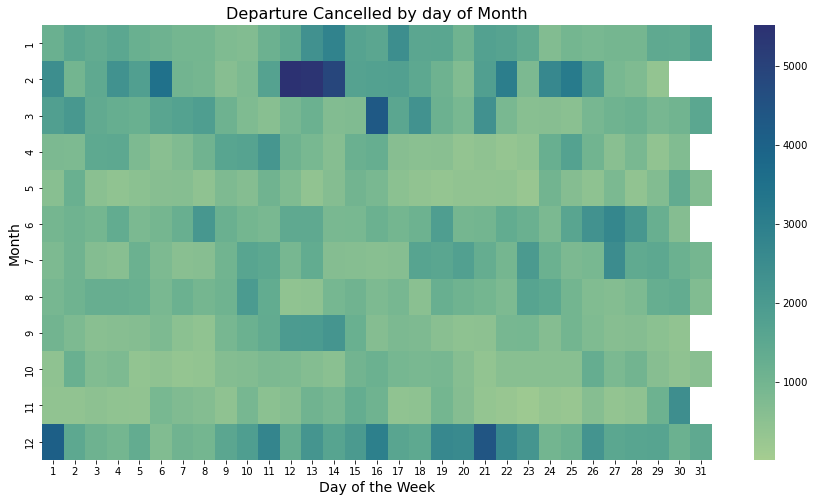

In [46]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayofMonth', values='Cancelled', aggfunc='sum')

#generate plot
plt.figure(figsize=(15,8));
sb.heatmap(pl,cmap='crest', vmin=15);

#set title and axis

plt.title('Departure Cancelled by day of Month', fontsize=16);
plt.xlabel('Day of the Week', fontsize=14);
plt.ylabel('Month', fontsize=14);

> Departure Cancelled by day of Month: 12th, 13th, 14th February had the most Cancelled flights

## What is the Day of Week has the most Cancelled Flights?

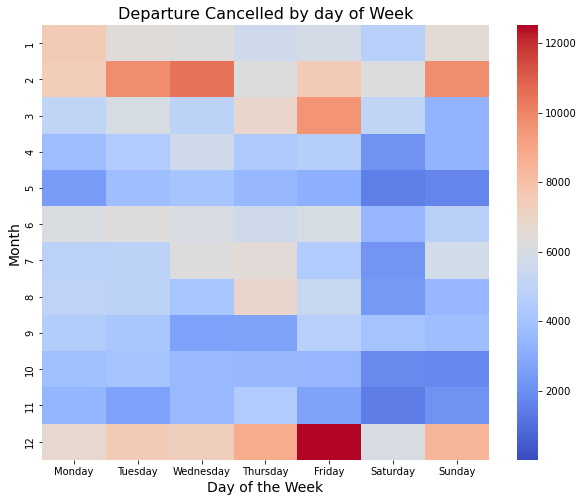

In [47]:
#pivot variables of interest
pl = df.pivot_table(index='Month',columns='DayOfWeek', values='Cancelled', aggfunc='sum')

#generate plot
plt.figure(figsize=(10,8));
graph=sb.heatmap(pl, cmap='coolwarm', vmin=15);
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday']
graph.set_xticklabels(week_day);
#set title and axis

plt.title('Departure Cancelled by day of Week', fontsize=16);
plt.xlabel('Day of the Week', fontsize=14);
plt.ylabel('Month', fontsize=14);


> Departure Cancelled by day of Week: Friday in December had the heighest average of cancelled flights

## What is the Scheduled Time Of Departure has the most Departure Delay Flights?

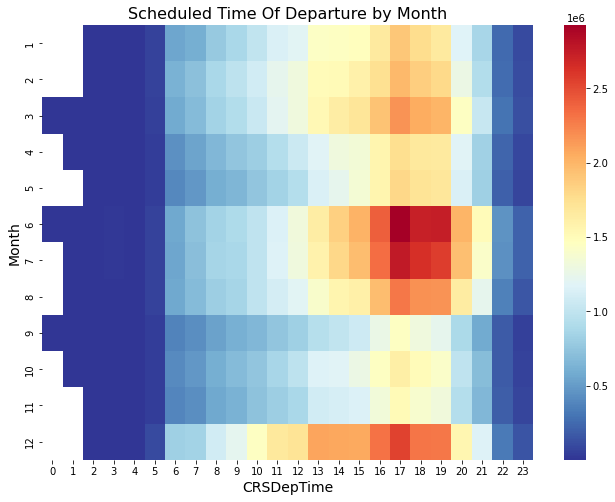

In [48]:
#pivot variables of interest
pl = df.pivot_table(index = 'Month', columns = 'CRSDepTime', values='DepDelay', aggfunc='sum')

#generate plot
plt.figure(figsize=(11,8));
sb.heatmap(pl, cmap='RdYlBu_r', vmin=15);

#set title and axis

plt.title('Scheduled Time Of Departure by Month', fontsize=16);
plt.xlabel('CRSDepTime', fontsize=14);
plt.ylabel('Month', fontsize=14);

> Scheduled Time Of Departure by Month: in June at 17:00 had the heighest average of delayed flights

## What is the Scheduled Time Of Departure has the most Departure Cancelled Flights?

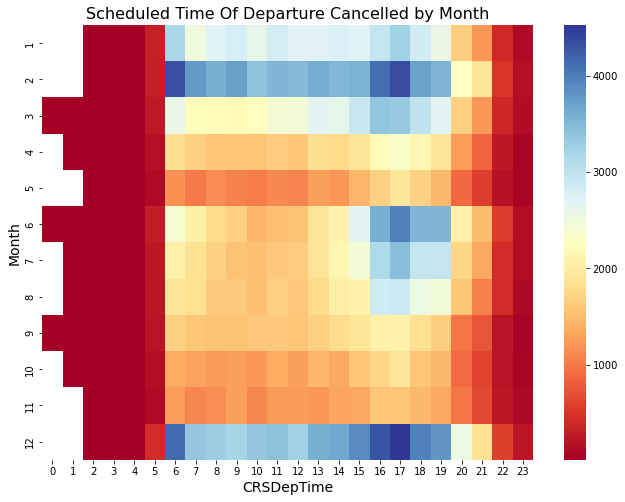

In [49]:
#pivot variables of interest
pl = df.pivot_table(index = 'Month', columns = 'CRSDepTime', values='Cancelled', aggfunc='sum')

#generate plot
plt.figure(figsize=(11,8));
sb.heatmap(pl, cmap='RdYlBu', vmin=15);

#set title and axis

plt.title('Scheduled Time Of Departure Cancelled by Month', fontsize=16);
plt.xlabel('CRSDepTime', fontsize=14);
plt.ylabel('Month', fontsize=14);

> Scheduled Time Of Departure Cancelled by Month: 17:00 in February

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Sunday in july is the day that had the highest Average of Departure delays

### Were there any interesting or surprising interactions between features?

> 12,13,14 February had the highest average of Cancelled flights (Mayebe because the Valentine's Day 😊❤️)

<a id='conc'></a>
## Conclusions
> These data are the data of the last three years (2008, 2007, 2006) from the data that were submitted, which were combined and analyzed, and the results of the analysis were divided into

> ### Univariate Exploration Result:
>  **Southwest Airlines** , **American Airlines** and **Envoy Air**: had the most delays and cancellation over mean by Carrier in **2008**, **2007**, **2006** <br>
> **Chicago O'Hare International Airport (ORD)** , **Atlanta Airport (ATL)** and **Dallas/Ft Worth Intl(DFW)**: had the most delays and cancellation over mean by Origin in **2008, 2007, 2006**<br>
> **Chicago O'Hare International Airport (ORD)** , **Atlanta Airport (ATL)** and **Dallas/Ft Worth Intl(DFW)**: had the most delays and cancellation over mean by Dest in **2008, 2007, 2006**<br>
> **Friday** had the most delays and cancellation over mean in **2008, 2007, 2006**<br>
> the **22th** day of month had the most delays and cancellation over mean in **2008, 2007, 2006**<br>
> **December** had the most delays and cancellation over mean in **2008, 2007, 2006**<br>
> Cancellation by Carrier and National Aviation System are the top two reasons for cancellations over mean<br>
> Scheduled departure time Maximum delay or cancellation is at 17:00<br>
> Scheduled Arrival time Maximum delay or cancellation is at 20:00<br>
> Plans with tail numbers : **N17175**, **N651ML**, **N715SF**, had the most delays and cancellation<br>
> Flights number **44** , **16**, **357** had the most delays<br>
> Distance = **337 miles** had the most delays and cancellation<br>
> Airtime on short flights of **100 minutes** or less has the Greatest cancelled flights<br>


> ###  Bivariate Exploration Results: 
> There is a strong relationship between 'DepDelay' and 'ArrDelay'<br>
> There is a positive Relation between 'ArrDelay' and 'AirTime'<br>
> There is a positive relationship between 'Distance' and 'AirTime'<br>
> There is a relationship between 'TaxiIn' and 'DepDelay'<br>
> There is Inverse relationship between 'TaxiOut' and 'DepDelay' since the linear regression had negative slop<br>
> There is Positive relationShip between 'TaxiIn' and 'ArrDelay'<br>
> There is positive Relationship between 'TaxiIn' and 'ArrDelay'<br>

> ### Multivariate Exploration results:
> Correlation Map: there is a very strong relationship between: <br>
.  'DepDelay' and 'ArrDelay'<br>
. 'Distance','AirTime'<br>
> Departure Delays by day of Month:
 23th December had the highest Average of Departure delays <br>
> Departure Delays by day of Week: Friday in December is the day that had the highest Average of Departure delays<br>
> Departure Cancelled by day of Month: 12th, 13th, 14th February had the most Cancelled flights<br>
> Departure Cancelled by day of Week: Friday in December had the heighest average of cancelled flights<br>
> Scheduled Time Of Departure by Month: in June at 17:00 had the heighest average of delayed flights<br>
> Scheduled Time Of Departure Cancelled by Month: 17:00 in February<br>

<a id=src></a>
# Sources:
- https://knowledge.udacity.com/questions/523432

- https://knowledge.udacity.com/questions/412638

- https://seaborn.pydata.org/generated/seaborn.heatmap.html

- http://www.aiandhumans.com/papers/RosenthalRojas_LDAV17.pdf

- https://www.statology.org/scatterplot-with-regression-line-python/


[Go up](#up)
<a id='down'></a>